# 3. Feature engineering
**Feature engineering** is the process of transforming data into features that better represent the underlying problem, resulting in improved machine learning performance.

- **Process of transforming data:** Note that we are not specifying raw data, unfiltered data, and so on. Feature engineering can be applied to data at any stage. Oftentimes, we will be applying feature engineering techniques to data that is already processed in the eyes of the data distributor. It is also important to mention that the data that we will be working with will usually be in a tabular format. The data will be organized into rows (observations) and columns (attributes). There will be times when we will start with data at its most raw form, such as in the examples of the server logs mentioned previously, but for the most part, we will deal with data already somewhat cleaned and organized.

- **Features:** The word features will obviously be used a lot in this book. At its most basic level, a feature is an attribute of data that is meaningful to the machine learning process. Many times we will be diagnosing tabular data and identifying which columns are features and which are merely attributes.

- **Better represent the underlying problem:** The data that we will be working with will always serve to represent a specific problem in a specific domain. It is important to ensure that while we are performing these techniques, we do not lose sight of the bigger picture. We want to transform data so that it better represents the bigger problem at hand.

- **Resulting in improved machine learning performance:** Feature engineering exists as a single part of the process of data science. As we saw, it is an important and oftentimes undervalued part. The eventual goal of feature engineering is to obtain data that our learning algorithms will be able to extract patterns from and use in order to obtain better results. We will talk in depth about machine learning metrics and results later on in this book, but for now, know that we perform feature engineering not only to obtain cleaner data, but to eventually use that data in our machine learning pipelines.

From **Ozdemir, Sinan; Susarla, Divya. Feature Engineering Made Easy**

We call it feature engineering, it often helps if we define a process we can follow on each project.

#### 1. Feature understanding:
- Structured versus unstructured data 
- The four levels of data 
- Identifying missing data values 
- Exploratory data analysis 
- Descriptive statistics Data visualizations

#### 2. Feature improvement
- Structuring unstructured data 
- Data imputing— inserting data where there was not a data before (missing data) 
- Normalization of data: 
   Standardization (known as z-score normalization), Min-max scaling, L1 and L2 normalization (projecting into different spaces, fun stuff)
   
#### 3. Feature selection
- Correlation coefficients 
- Identifying and removing multicollinearity 
- Chi-squared tests Anova tests 
- Interpretation of p-values 
- Iterative feature selection 
- Using machine learning to measure entropy and information gain

#### 4. Feature construction: 
- e.g Create new features out of existing features given to us.

#### 5. Feature transformation
- e.g PCA

#### 6. Feature learning  –   using AI to better our AI
- e.g word2vec


** In section 2 and section 3, we finished the tasks of data understanding and exploratory analysis, somehow we can consider it feature understanding. So in this section, we mainly focus on feature improvement and feature selection. Feature construction, feature transformation, feature learning will not be covered in this notebook. We may consider using them when we resolve specific problems. For example word2vec when classifying texts**

In [64]:
import pandas as pd

In [65]:
df_train = pd.read_csv("../../data/Titanic/train.csv")

#### Missing data

In [66]:
# Cabin缺失值比较多，达到77%, 我们直接drop掉，如果觉得太粗暴，也可以构造一个包含两个值的feature, Cabin有值和Cabin没值

In [67]:
df_train.drop(columns='Cabin',inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
# Embarked缺失值不多，用众数填充
df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace=True)

In [69]:
# Age比较麻烦，Age的信息比较重要，但有19.9%的值是缺失的。如果用均值填充，直觉告诉我不合适。（这里也可以用决策树来预测Age, 后续补上），为了简化，暂且用均值填充

In [70]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
26.000000     18
32.000000     18
27.000000     18
31.000000     17
16.000000     17
23.000000     15
34.000000     15
33.000000     15
20.000000     15
39.000000     14
40.000000     13
42.000000     13
17.000000     13
45.000000     12
38.000000     11
4.000000      10
50.000000     10
2.000000      10
            ... 
0.830000       2
30.500000      2
0.750000       2
57.000000      2
55.000000      2
70.000000      2
10.000000      2
32.500000      2
71.000000      2
63.000000      2
28.500000      2
45.500000      2
40.500000      2
59.000000      2
14.500000      1
0.670000       1
12.000000      1
0.920000       1
74.000000      1
34.500000      1
70.500000      1
36.500000      1
24.500000      1
66.000000      1
80.000000      1
55.500000      1
53.000000      1
20.500000     

#### Dummy varibles

In [71]:
Embarked_dummies = pd.get_dummies(df_train['Embarked'],prefix='embarked')
df_train = df_train.join(Embarked_dummies)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1


In [72]:
Plcass_dummies = pd.get_dummies(df_train['Pclass'], prefix='Pclass')
df_train = df_train.join(Plcass_dummies)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,embarked_C,embarked_Q,embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1


In [73]:
Sex_dummies = pd.get_dummies(df_train['Sex'], prefix='Sex')
df_train = df_train.join(Sex_dummies)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,embarked_C,embarked_Q,embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1,0,1


In [74]:
df_train['Embarked_no'] = pd.factorize(df_train['Embarked'])[0]

In [75]:
df_train['Sex_no'] = pd.factorize(df_train['Sex'])[0]

#### Scaling

In [76]:
from sklearn import preprocessing

In [77]:
stdScaler = preprocessing.StandardScaler()
df_train['age_scaled'] = stdScaler.fit_transform(df_train['Age'].values.reshape(-1,1))
df_train['fare_scaled'] = stdScaler.fit_transform(df_train['Fare'].values.reshape(-1,1))

#### 特征相关性

In [78]:
columns = ['Survived', 'Pclass', 'Age','SibSp', 'Parch', 'Embarked_no', 'Sex_no']
df_train_important = df_train[columns]
df_train_important.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked_no,Sex_no
0,0,3,22.0,1,0,0,0
1,1,1,38.0,1,0,1,1
2,1,3,26.0,0,0,0,1
3,1,1,35.0,1,0,0,1
4,0,3,35.0,0,0,0,0


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

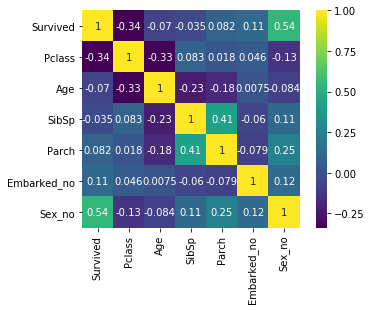

In [80]:
colormap = plt.cm.viridis
sns.heatmap(df_train_important.astype(float).corr(), vmax=1.0,square=True,annot=True, cmap=colormap)

In [81]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_no,Sex_no,age_scaled,fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,1,0,1,0,0,-0.592481,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,0,1,1,0.638789,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,1,0,0,1,-0.284663,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,1,0,0,1,0.407926,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,1,0,1,0,0,0.407926,-0.486337


In [82]:
df_train.to_csv("../../data/Titanic/train_processed.csv",index=False)